# Project Overview
---------

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 
Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.



|Variable|Description|
|---|---|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

# Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import seaborn as sns
sns.set()

# Where to save the figures
PROJECT_ROOT_DIR = "."
#CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    if not os.path.isdir(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Import Data

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/dorond/big-mart-sales-prediction/master/"
STORES_PATH = os.path.join("datasets")
STORES_URL = DOWNLOAD_ROOT + "datasets/stores.tgz"

def fetch_store_data(stores_url=STORES_URL, stores_path=STORES_PATH):
    if not os.path.isdir(stores_path):
        os.makedirs(stores_path)
    tgz_path = os.path.join(stores_path, "stores.tgz")
    urllib.request.urlretrieve(stores_url, tgz_path)
    stores_tgz = tarfile.open(tgz_path)
    stores_tgz.extractall(path=stores_path)
    stores_tgz.close()

In [3]:
fetch_store_data()

In [4]:
import pandas as pd

def load_stores_training_data(stores_path=STORES_PATH):
    csv_path = os.path.join(stores_path, "train.csv")
    return pd.read_csv(csv_path)

def load_stores_test_data(stores_path=STORES_PATH):
    csv_path = os.path.join(stores_path, "test.csv")
    return pd.read_csv(csv_path)

def load_stores_sample_data(stores_path=STORES_PATH):
    csv_path = os.path.join(stores_path, "sample_submission.csv")
    return pd.read_csv(csv_path)

In [5]:
train = load_stores_training_data()
test = load_stores_test_data()
sample = load_stores_sample_data()

In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


## Preliminary Investigation

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


- Item_weight and Outlet_size have missing values.

In [10]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- Different spellings of similar categories > Low Fat & LF & low fat; Regular & reg. Will need to correct these.

In [11]:
train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

- Might be useful to add a column to group drinks and food together

In [12]:
train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
train["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [14]:
train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [15]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Saving figure 1_attribute_histogram_plots


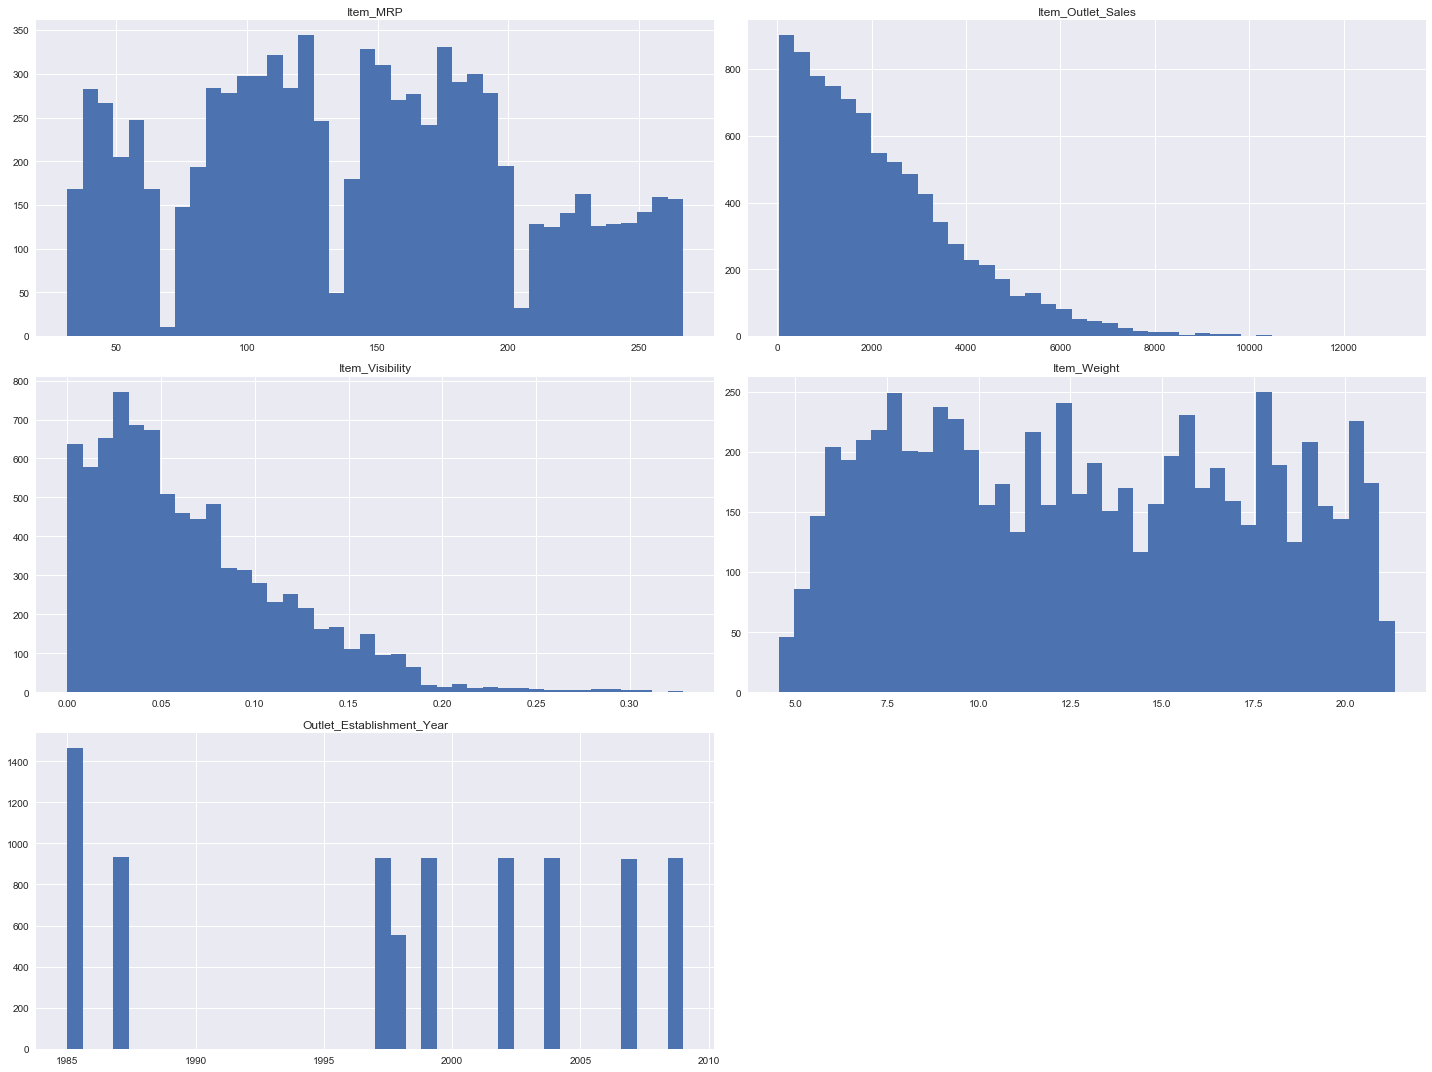

In [16]:
train.hist(bins=40, figsize=(20,15))
save_fig("1_attribute_histogram_plots")
plt.show()

- Few distinct categories of pricing, might be useful to add a price range column. 
- Period of 10 years where no new stores where created, with more being establish in 1985. Buisiness seemed to scale from around 1997. 
- Most itms have less than 10% visibility. Need to correlate sales with visibility, do more visible items have more sales volume?
- Weight seems to be fairly uniformly distributed across all product types, as expected. 

In [17]:
# to make this notebook's output identical at every run
np.random.seed(42)

## Creating Stratified Training and Validation Sets
We must ensure that the 80% sample of data we use for the training set is representative of the full dataset. To do this, we'll understand a few proportions within the data before constructing a 80% training set and 20% test set. 

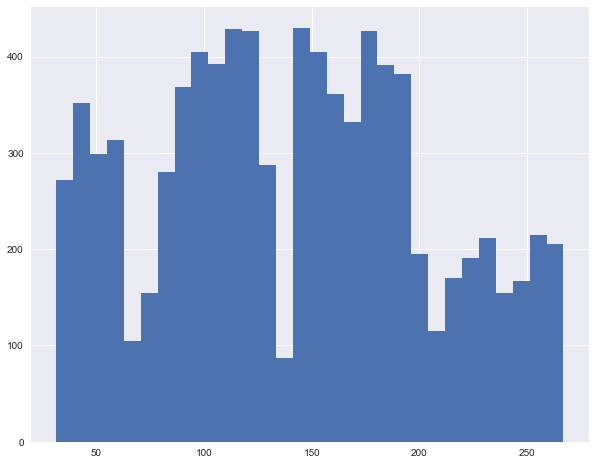

In [18]:
# We previously identified different product price ranges, it might be useful to ensure similar splits exist within the final training set. 
train["Item_MRP"].hist(figsize=(10,8), bins=30)

In [19]:
price_cat = np.ceil(train["Item_MRP"] / 70)
price_cat.value_counts()

3.0    3042
2.0    2778
4.0    1362
1.0    1341
Name: Item_MRP, dtype: int64

In [20]:
# Divide by 70 to limit the number of price range categories
train["price_cat"] = np.ceil(train["Item_MRP"] / 70)

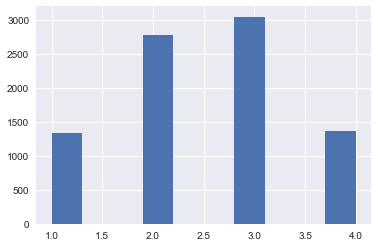

In [21]:
train["price_cat"].hist()

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train, train["price_cat"]):
    strat_train_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]

In [23]:
strat_test_set["price_cat"].value_counts() / len(strat_test_set)

3.0    0.357185
2.0    0.326100
4.0    0.159531
1.0    0.157185
Name: price_cat, dtype: float64

In [24]:
train["price_cat"].value_counts() / len(train)

3.0    0.356917
2.0    0.325942
4.0    0.159803
1.0    0.157339
Name: price_cat, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

def price_cat_proportions(data):
    return data["price_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(train, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": price_cat_proportions(train),
    "Stratified": price_cat_proportions(strat_test_set),
    "Random": price_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [26]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.157339,0.157185,0.161877,2.884135,-0.098014
2.0,0.325942,0.326100,0.354839,8.865742,0.048517
3.0,0.356917,0.357185,0.340762,-4.526020,0.075136
4.0,0.159803,0.159531,0.142522,-10.813880,-0.170269


In [27]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("price_cat", axis=1, inplace=True)

# Discover & Visualise Data

## Understanding Numerical Relationships

In [28]:
# Ensuring we have a clean copy of training data from which to perform an EDA.
sales = strat_train_set.copy()

### Exploring Correlations

In [29]:
corr_matrix = sales.corr()

In [30]:
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.566739
Item_Weight                  0.019046
Outlet_Establishment_Year   -0.043774
Item_Visibility             -0.128151
Name: Item_Outlet_Sales, dtype: float64

Saving figure 2_sales_correlation_bar_plot


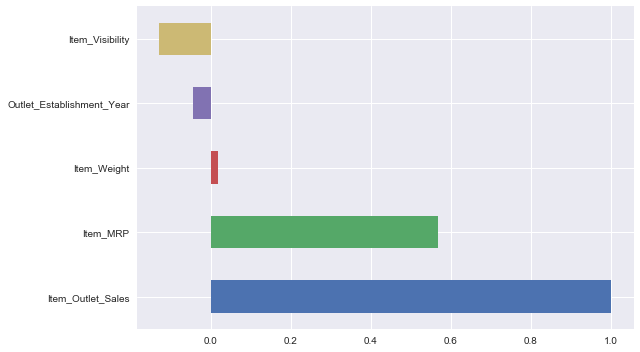

In [31]:
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False).plot.barh(figsize=(9, 5))
save_fig("2_sales_correlation_bar_plot")

- Item visibility has a small negative correlation with sales, could be due to outliers though. 

Saving figure 3_scatter_matrix_plot


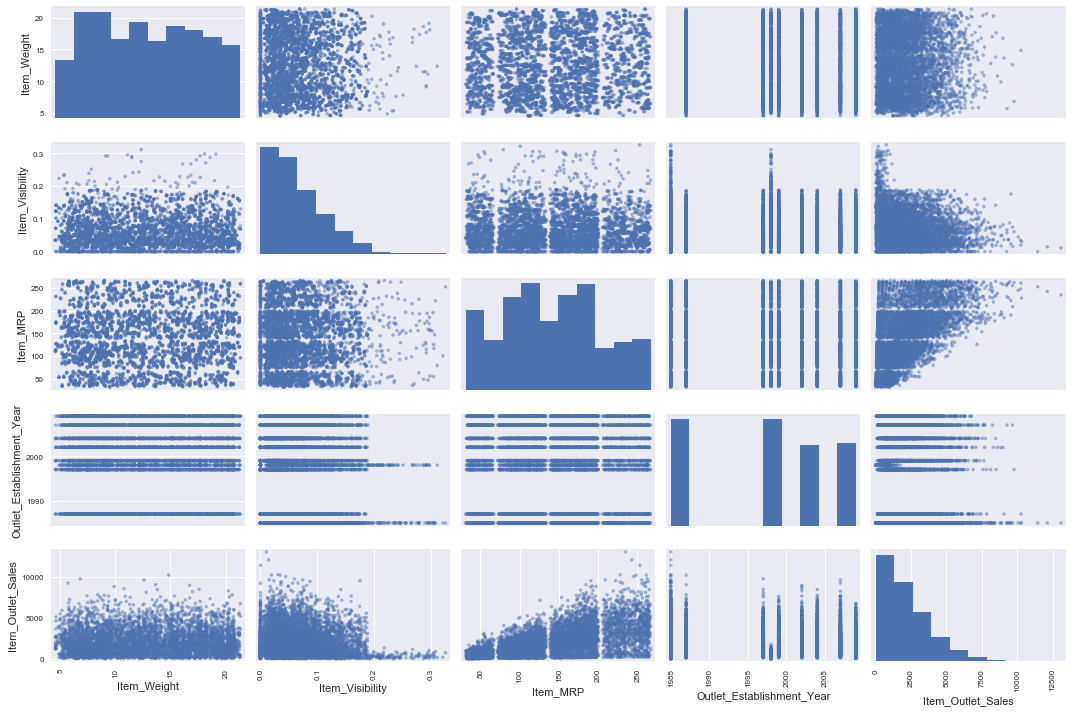

In [32]:
from pandas.plotting import scatter_matrix

scatter_matrix(sales, figsize=(15, 10))
save_fig("3_scatter_matrix_plot")

Saving figure 4_price_vs_sales_scatterplot


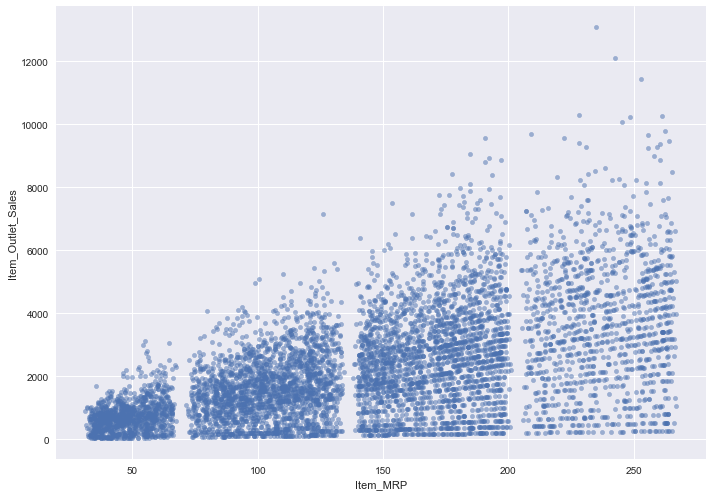

In [33]:
sales.plot(kind="scatter", x="Item_MRP", y="Item_Outlet_Sales",
             alpha=0.5, figsize=(10, 7))
#plt.axis([0, 16, 0, 550000])
save_fig("4_price_vs_sales_scatterplot")

- We identified 4 distinct pricing categories. In addition it seems there are discrete cutoff points between each.
- While there are generally 2000 worth of sales across all price categories, it seems that as the price points increase, so do the sales. 

Saving figure 5_visibility_vs_sales_scatterplot


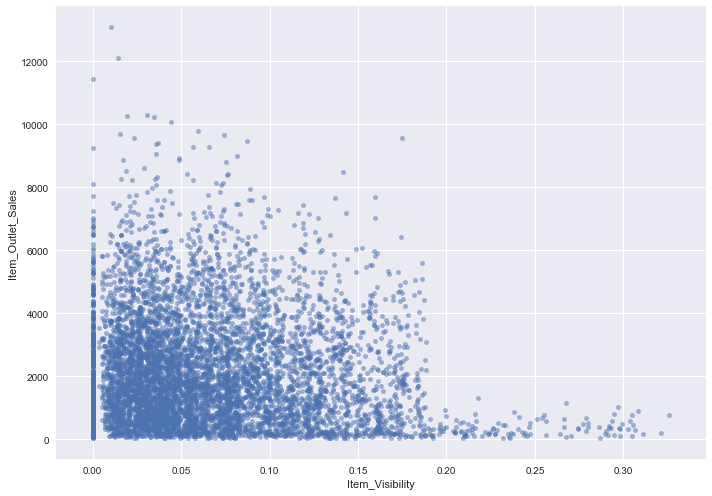

In [34]:
sales.plot(kind="scatter", x="Item_Visibility", y="Item_Outlet_Sales",
             alpha=0.5, figsize=(10, 7))
#plt.axis([0, 16, 0, 550000])
save_fig("5_visibility_vs_sales_scatterplot")

- Some outliers have almost no visibility but a large amount of sales. 
- It seems as visibility goes beyond 20%, sales diminish. 
- A number of sales are generated from items with 0 visibility, must be explored.

### Investigating Outliers

In [35]:
zero_vis_sales = sales[(sales["Item_Visibility"] == 0)]
zero_vis_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8404,DRH39,NaN,low fat,0.0,Dairy,75.9670,OUT019,1985,Small,Tier 1,Grocery Store,153.1340
1972,NCO02,11.150,Low Fat,0.0,Others,65.0142,OUT049,1999,Medium,Tier 1,Supermarket Type1,1120.5414
968,NCO17,10.000,Low Fat,0.0,Health and Hygiene,120.6440,OUT035,2004,Small,Tier 2,Supermarket Type1,1917.5040
1346,FDN12,15.600,Low Fat,0.0,Baking Goods,111.8544,OUT018,2009,Medium,Tier 3,Supermarket Type2,1454.1072
6938,FDY33,14.500,Regular,0.0,Snack Foods,159.3262,OUT035,2004,Small,Tier 2,Supermarket Type1,2864.2716
3687,DRK37,5.000,Low Fat,0.0,Soft Drinks,189.8530,OUT045,2002,NaN,Tier 2,Supermarket Type1,4933.5780
623,FDY59,8.195,Low Fat,0.0,Baking Goods,93.1462,OUT018,2009,Medium,Tier 3,Supermarket Type2,647.8234
500,NCK54,12.150,Low Fat,0.0,Household,117.8150,OUT017,2007,NaN,Tier 2,Supermarket Type1,2330.3000
7102,FDQ39,14.800,Low Fat,0.0,Meat,189.3846,OUT013,1987,High,Tier 3,Supermarket Type1,4777.1150
6093,FDE21,NaN,Low Fat,0.0,Fruits and Vegetables,115.3492,OUT027,1985,Medium,Tier 3,Supermarket Type3,3823.0236


Saving figure 6_zero_visibility_sales_by_fat_content


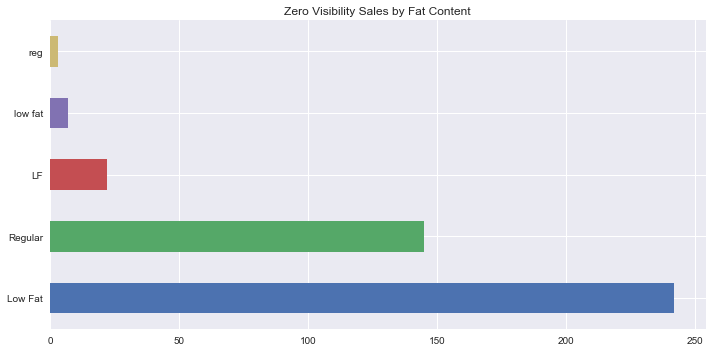

In [36]:
zero_vis_sales["Item_Fat_Content"].value_counts().plot.barh(figsize=(10, 5), title='Zero Visibility Sales by Fat Content')
save_fig('6_zero_visibility_sales_by_fat_content')

Saving figure 7_zero_visibility_sales_by_item_type


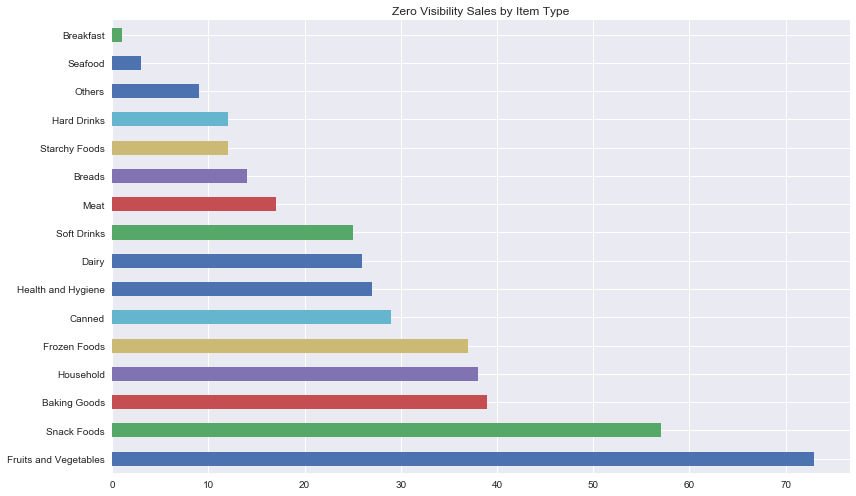

In [37]:
zero_vis_sales["Item_Type"].value_counts().plot.barh(figsize=(12, 7), title='Zero Visibility Sales by Item Type')
save_fig('7_zero_visibility_sales_by_item_type')

Saving figure 8_zero_visibility_sales_by_outlet


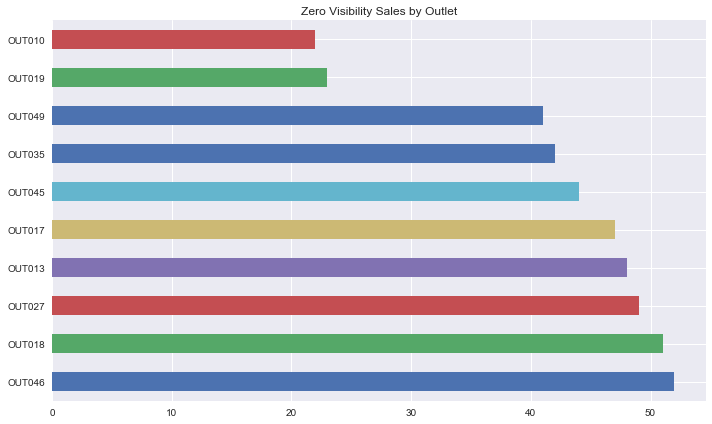

In [38]:
zero_vis_sales["Outlet_Identifier"].value_counts().plot.barh(figsize=(10, 6), title='Zero Visibility Sales by Outlet')
save_fig('8_zero_visibility_sales_by_outlet')

Saving figure 9_zero_visibility_sales_by_outlet_size


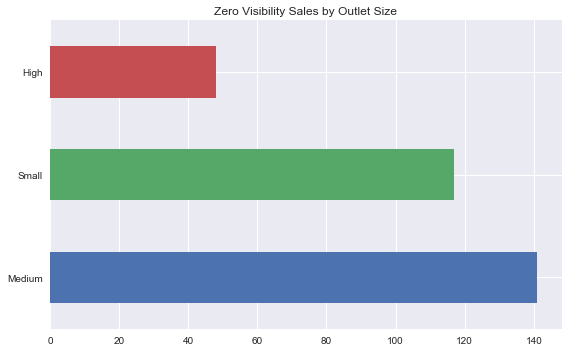

In [39]:
zero_vis_sales["Outlet_Size"].value_counts().plot.barh(figsize=(8, 5), title='Zero Visibility Sales by Outlet Size')
save_fig('9_zero_visibility_sales_by_outlet_size')

Saving figure 10_zero_visibility_sales_by_item_type


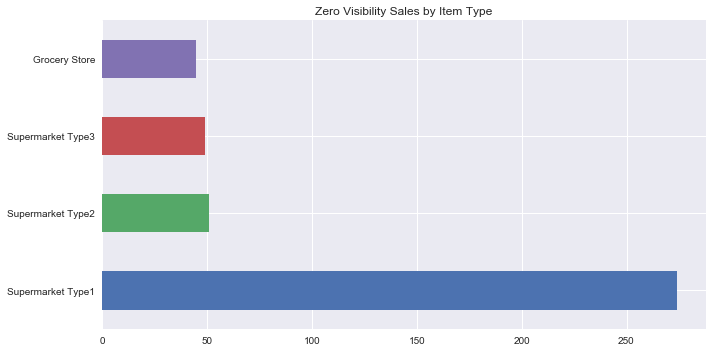

In [40]:
zero_vis_sales["Outlet_Type"].value_counts().plot.barh(figsize=(10, 5), title='Zero Visibility Sales by Item Type')
save_fig('10_zero_visibility_sales_by_item_type')

- The highest amount of items with zero visibility seems to be coming from Type 1 Medium Supermarkets, fruit & vegetables products marked as low fat. 

In [41]:
low_vis_high_sales = sales[(sales["Item_Visibility"] < 0.02) & (sales["Item_Outlet_Sales"] > 11000)]
low_vis_high_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1450,FDZ20,NaN,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
5223,FDQ19,NaN,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
7188,NCE42,NaN,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648


- All the items with low visibility but high sales are from the same store and don't have a weight specified. 
- OUT27 also had a lot of items with zero visibility specified. 

In [42]:
high_vis_low_sales = sales[(sales["Item_Visibility"] > 0.19) & (sales["Item_Outlet_Sales"] < 2000)]
high_vis_low_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
7949,FDK25,NaN,Regular,0.274592,Breakfast,167.8474,OUT019,1985,Small,Tier 1,Grocery Store,336.8948
847,FDL56,NaN,Low Fat,0.220226,Fruits and Vegetables,85.6198,OUT019,1985,Small,Tier 1,Grocery Store,87.2198
7072,FDL32,NaN,Regular,0.214424,Fruits and Vegetables,111.6544,OUT019,1985,Small,Tier 1,Grocery Store,335.5632
6909,FDC47,15.000,Low Fat,0.198999,Snack Foods,226.5694,OUT010,1998,NaN,Tier 3,Grocery Store,913.4776
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
3767,FDN13,NaN,Low Fat,0.266234,Breakfast,98.5358,OUT019,1985,Small,Tier 1,Grocery Store,402.1432
4530,FDZ16,16.850,Regular,0.267566,Frozen Foods,194.1478,OUT010,1998,NaN,Tier 3,Grocery Store,1162.4868
7250,FDT24,12.350,Regular,0.311090,Baking Goods,79.2328,OUT010,1998,NaN,Tier 3,Grocery Store,154.4656
4350,FDN49,17.250,Regular,0.209600,Breakfast,40.3480,OUT010,1998,NaN,Tier 3,Grocery Store,39.9480


Saving figure 11_high_visibility_low_sales_by_item_type


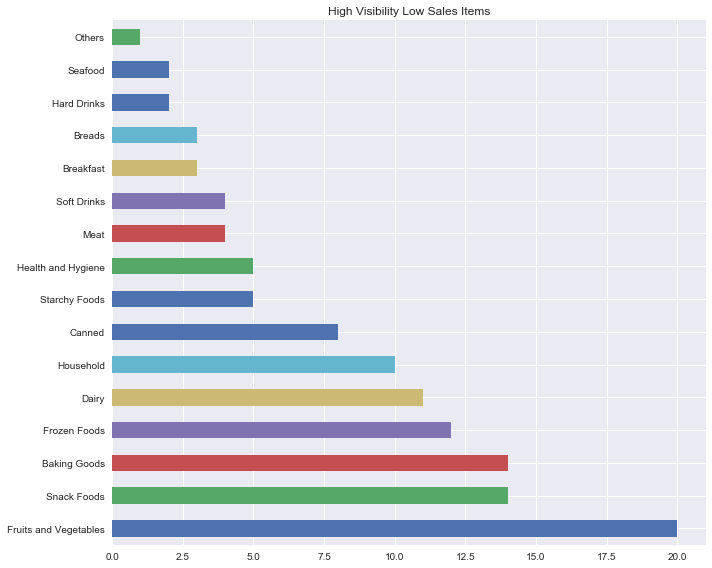

In [43]:
high_vis_low_sales["Item_Type"].value_counts().plot.barh(figsize=(10, 8), title="High Visibility Low Sales Items")
save_fig('11_high_visibility_low_sales_by_item_type')

In [44]:
high_vis_low_sales["Outlet_Type"].value_counts()

Grocery Store    118
Name: Outlet_Type, dtype: int64

- All the items with low visibility but high sales are from Grocery stores.

## Understanding Categorical Relationships

In [45]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
251,FDL20,17.10,Low Fat,0.128938,Fruits and Vegetables,112.3886,OUT018,2009,Medium,Tier 3,Supermarket Type2,1779.0176
5943,FDM58,16.85,Regular,0.079624,Snack Foods,111.6544,OUT013,1987,High,Tier 3,Supermarket Type1,2125.2336
4778,FDT09,15.15,Regular,0.012333,Snack Foods,130.0284,OUT017,2007,NaN,Tier 2,Supermarket Type1,3559.3668
8432,FDI16,14.00,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
4889,FDP01,20.75,Regular,0.063314,Breakfast,153.7682,OUT035,2004,Small,Tier 2,Supermarket Type1,1829.6184


### Sales by Item Type

In [46]:
sales_by_item_type = sales.groupby(["Item_Type"])['Item_Outlet_Sales'].sum()
sales_by_item_type

Item_Type
Baking Goods             1.026592e+06
Breads                   4.246506e+05
Breakfast                1.962679e+05
Canned                   1.185942e+06
Dairy                    1.240867e+06
Frozen Foods             1.438243e+06
Fruits and Vegetables    2.251777e+06
Hard Drinks              3.651920e+05
Health and Hygiene       8.415366e+05
Household                1.629266e+06
Meat                     7.136004e+05
Others                   2.670471e+05
Seafood                  1.138525e+05
Snack Foods              2.150829e+06
Soft Drinks              7.275822e+05
Starchy Foods            2.841435e+05
Name: Item_Outlet_Sales, dtype: float64

Saving figure 12_total_sales_by_item_type


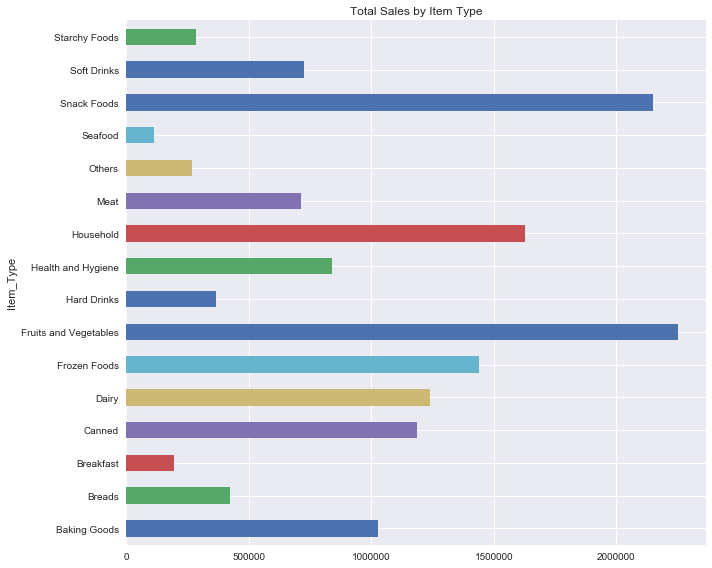

In [47]:
sales_by_item_type.plot.barh(figsize=(10,8), title="Total Sales by Item Type")
save_fig('12_total_sales_by_item_type')

### Sales by Item Type and Outlet Type

In [48]:
sales_by_item_type_outlet_type = sales.groupby(["Item_Type", "Outlet_Type"])['Item_Outlet_Sales'].sum().unstack().fillna(0)
sales_by_item_type_outlet_type

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,20476.6790,7.321803e+05,92490.2728,181445.1476
Breads,9722.0116,2.911204e+05,53636.1822,70171.9910
Breakfast,5920.9594,1.347246e+05,14917.2490,40705.0146
Canned,21366.8536,8.238496e+05,112679.9920,228045.8212
Dairy,24593.9862,8.629354e+05,134649.3946,218688.6680
Frozen Foods,27638.6896,1.004697e+06,135815.8762,270091.0912
Fruits and Vegetables,39687.6722,1.558447e+06,224291.3750,429351.1170
Hard Drinks,4762.4674,2.680877e+05,29582.1598,62759.6396
Health and Hygiene,19595.8256,5.843980e+05,82966.6696,154576.1228


Saving figure 13_total_sales_by_item_type_and_outlet_type


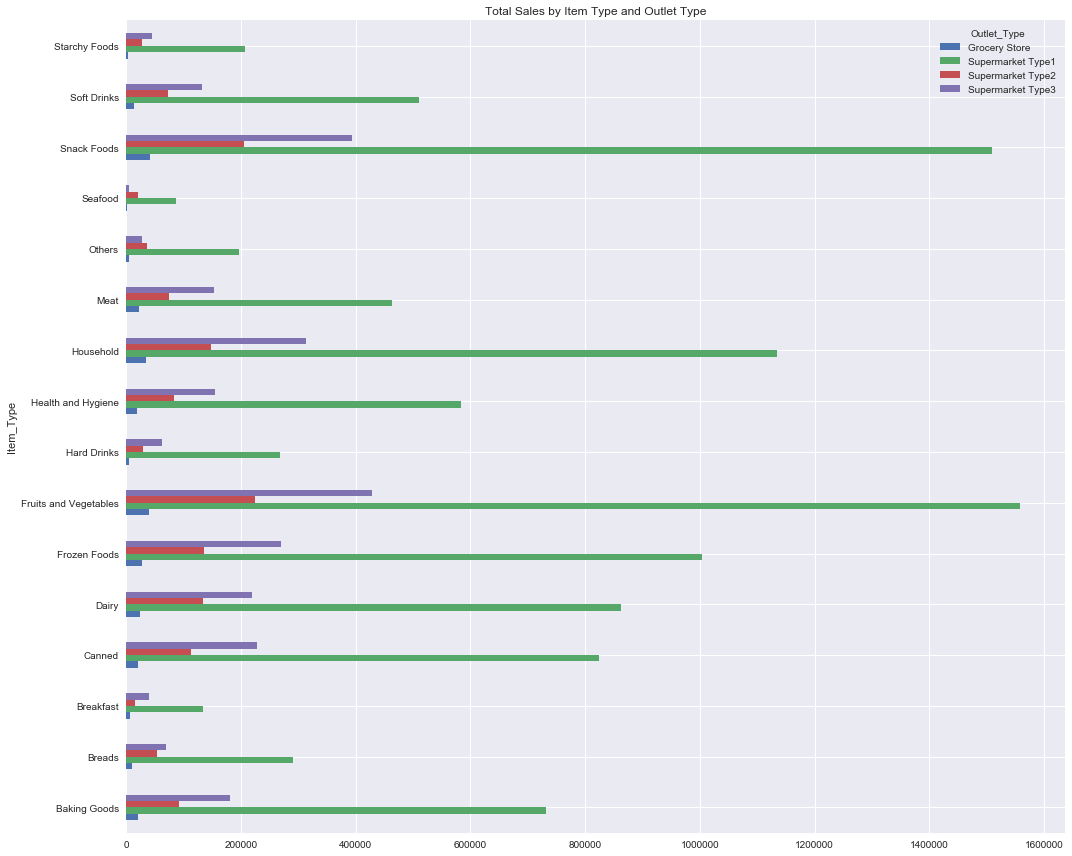

In [49]:
sales_by_item_type_outlet_type.plot.barh(figsize=(15,12), title="Total Sales by Item Type and Outlet Type")
save_fig('13_total_sales_by_item_type_and_outlet_type')

### Listing Price by Item Type

In [50]:
listing_price_by_item_type = sales.groupby(["Item_Type"])['Item_MRP'].median()#.unstack().fillna(0)
listing_price_by_item_type

Item_Type
Baking Goods             112.4544
Breads                   128.8310
Breakfast                155.3630
Canned                   140.1496
Dairy                    150.4708
Frozen Foods             127.2678
Fruits and Vegetables    145.4444
Hard Drinks              143.8128
Health and Hygiene       129.6468
Household                154.2814
Meat                     149.8366
Others                   127.5507
Seafood                  158.4604
Snack Foods              146.9076
Soft Drinks              143.9102
Starchy Foods            172.9593
Name: Item_MRP, dtype: float64

Saving figure 14_median_listing_price_by_item_type


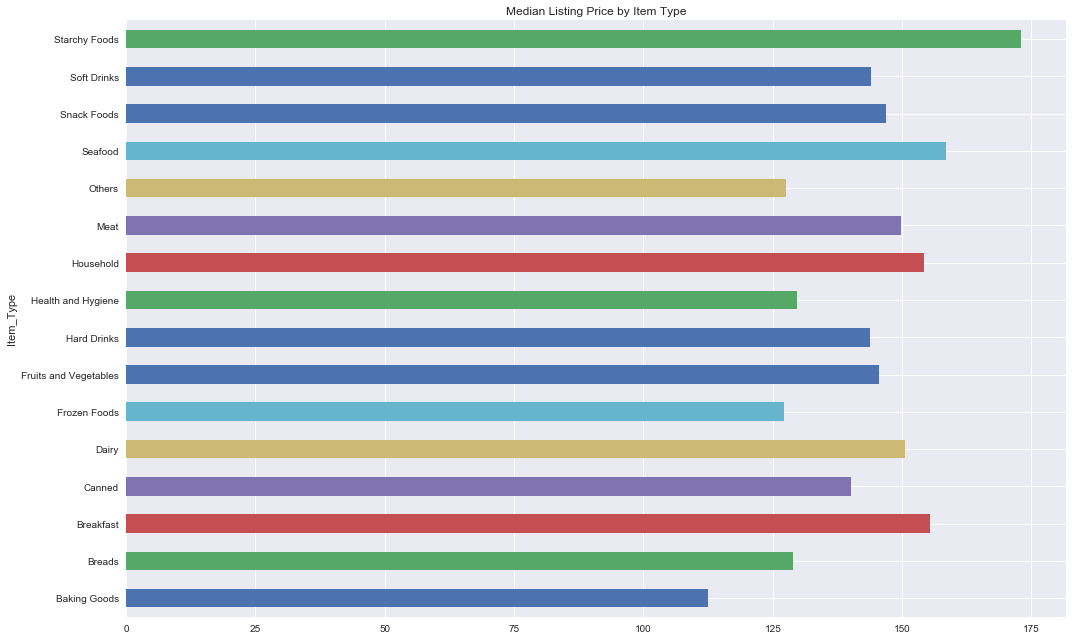

In [51]:
listing_price_by_item_type.plot.barh(figsize=(15,9), title="Median Listing Price by Item Type")
save_fig('14_median_listing_price_by_item_type')

### Listing Price by Item Type and Outlet Type

In [52]:
listing_price_by_item_type_outlet_type = sales.groupby(["Item_Type", "Outlet_Type"])['Item_MRP'].median().unstack().fillna(0)
listing_price_by_item_type_outlet_type

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,121.3098,110.5570,111.8544,121.5914
Breads,130.0152,130.3310,126.0678,110.1570
Breakfast,165.3500,151.7682,131.3310,169.3474
Canned,141.8838,138.6838,123.8046,153.4682
Dairy,147.1760,150.6708,155.4485,124.3704
Frozen Foods,126.9178,127.4020,126.4520,126.9336
Fruits and Vegetables,124.2388,147.6102,131.3126,146.0760
Hard Drinks,122.6585,136.5732,174.2080,165.7000
Health and Hygiene,140.7654,131.3310,114.4492,124.1072


Saving figure 14_median_listing_price_by_item_type_outlet_type


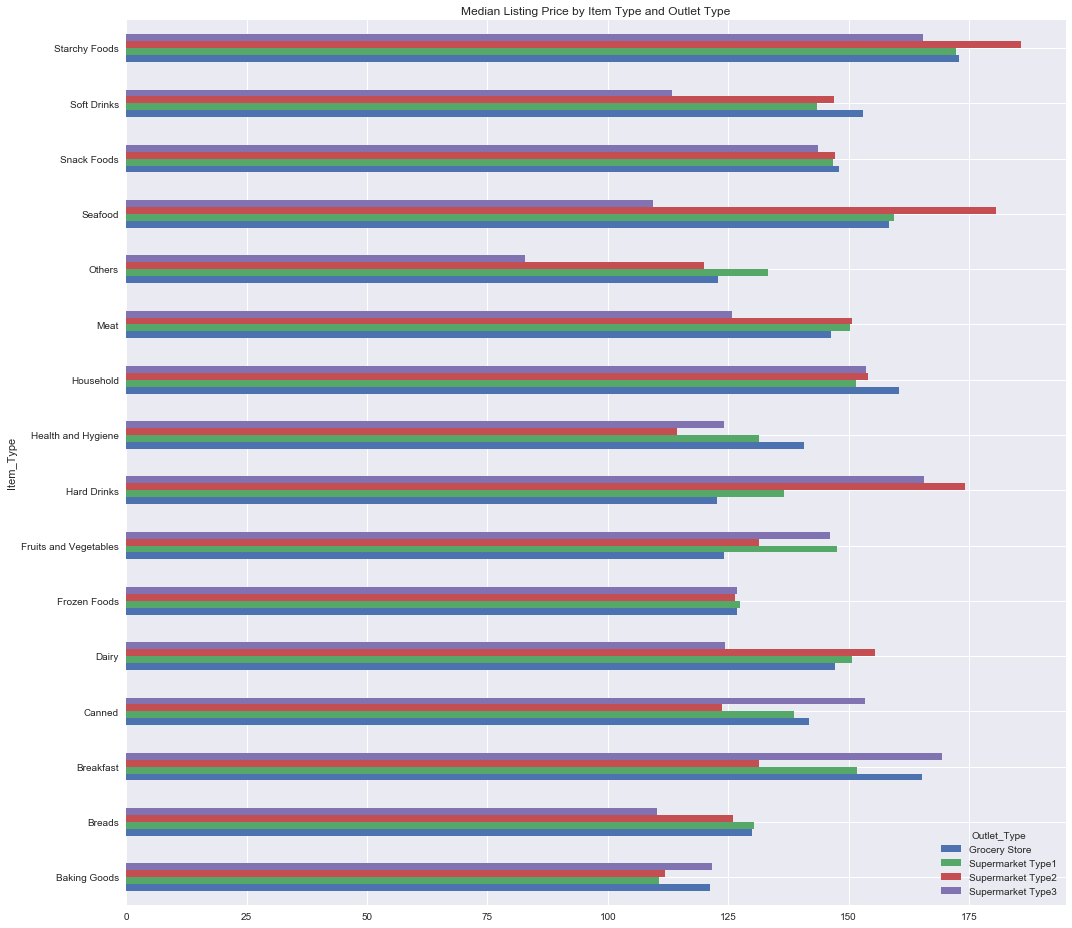

In [53]:
listing_price_by_item_type_outlet_type.plot.barh(figsize=(15,13), title="Median Listing Price by Item Type and Outlet Type")
save_fig('14_median_listing_price_by_item_type_outlet_type')

### Listing Price by Fat Content

In [54]:
listing_price_by_fat_content = sales.groupby(["Item_Fat_Content"])['Item_MRP'].median()#.unstack().fillna(0)
listing_price_by_fat_content

Item_Fat_Content
LF         141.9154
Low Fat    142.3154
Regular    143.9786
low fat    113.9373
reg        150.8708
Name: Item_MRP, dtype: float64

Saving figure 15_median_listing_price_by_fat_content


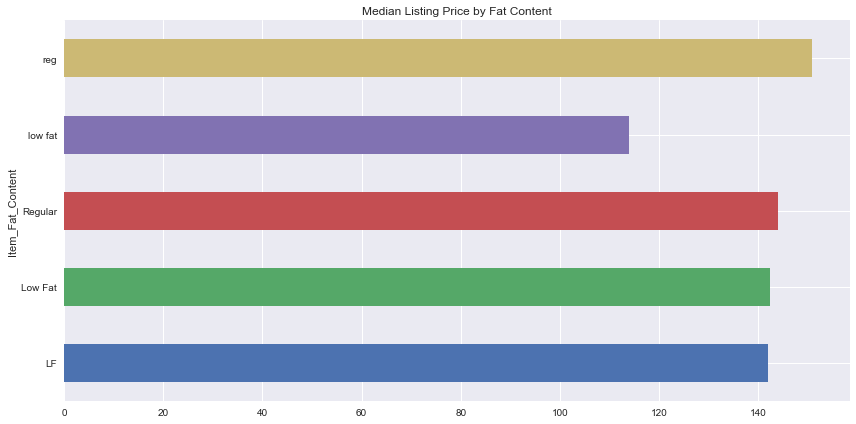

In [55]:
listing_price_by_fat_content.plot.barh(figsize=(12,6), title="Median Listing Price by Fat Content")
save_fig('15_median_listing_price_by_fat_content')

### Sales by Fat Content and Outlet Type

In [56]:
fat_content_sales = sales.groupby(["Item_Fat_Content", "Outlet_Type"])['Item_Outlet_Sales'].sum().unstack().fillna(0)
fat_content_sales

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Fat_Content,,,,
LF,9961.0338,3.504884e+05,77046.3760,9.472470e+04
Low Fat,173483.5112,6.171984e+06,838238.2052,1.604920e+06
Regular,104813.5650,3.579258e+06,498971.1598,9.762845e+05
low fat,4137.2812,1.154983e+05,18357.4376,3.571018e+04
reg,4839.0344,1.518923e+05,34727.4622,1.205431e+04


Saving figure 16_total_sales_by_fat_content_outlet_type


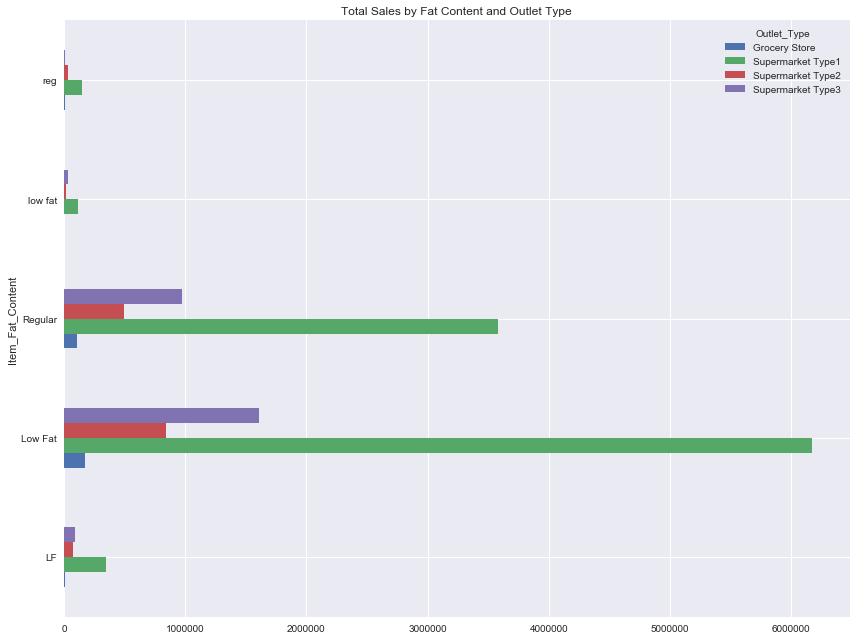

In [57]:
fat_content_sales.plot.barh(figsize=(12,9), title="Total Sales by Fat Content and Outlet Type")
save_fig('16_total_sales_by_fat_content_outlet_type')

### Sales by Outlet Type and Size

In [58]:
outlet_type_size_sales = sales.groupby(["Outlet_Type", "Outlet_Size"])['Item_Outlet_Sales'].sum().unstack().fillna(0)
outlet_type_size_sales

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0.000000e+00,0.000000e+00,146136.442
Supermarket Type1,1.722534e+06,1.784394e+06,3466271.315
Supermarket Type2,0.000000e+00,1.467341e+06,0.000
Supermarket Type3,0.000000e+00,2.723693e+06,0.000


Saving figure 17_total_sales_by_outlet_type_outlet_size


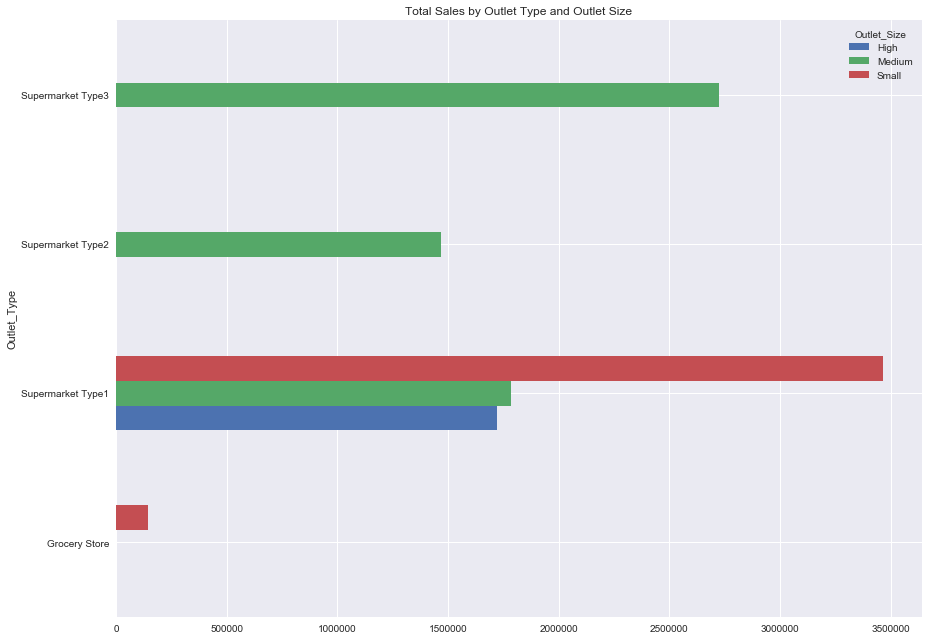

In [59]:
outlet_type_size_sales.plot.barh(figsize=(13,9), title="Total Sales by Outlet Type and Outlet Size")
save_fig('17_total_sales_by_outlet_type_outlet_size')

## Observations

# Adding New Features

# Prepare Data for Machine Learning

# Train Models

# Fine-tune Models

# Explore Data Using Best Parameters

# Export Submission